## <네이버 영화 사이트 크롤링 후 시각화>
### 네이버 영화 사이트 '상영작', '예정작' 크롤링
---
> - 네이버 영화 제목, 네티즌 별점 점수 크롤링하여 예매순 상위 10개 출력하기
> - 예매순 순위 10개의 별점 점수에 대해 그래프로 시각화하기
> - 예매순 상위 10개의 별점 점수 중 가장 높은 영화의 그래프를 색상으로 강조하기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [4]:
response = requests.get("https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220707")
html = response.text
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220707" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [5]:
title = soup.select("td.title > div > a")
point = soup.select("td.point")

print(title)
print(point)

[<a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>, <a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>, <a href="/movie/bi/mi/basic.naver?code=10101" title="로마의 휴일">로마의 휴일</a>, <a href="/movie/bi/mi/basic.naver?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>, <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>, <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>, <a href="/movie/bi/mi/basic.naver?code=208772" title="카시오페아">카시오페아</a>, <a href="/movie/bi/mi/basic.naver?code=36944" title="올드보이">올드보이</a>, <a href="/movie/bi/mi/basic.naver?code=189623" title="남매의 여름밤">남매의 여름밤</a>, <a href="/movie/bi/mi/basic.naver?code=10128" title="디어 헌터">디어 헌터</a>, <a href="/movie/bi/mi/basic.naver?code=17059" title="중경삼림">중경삼림</a>, <a href="/movie/bi/mi/basic.naver?code=183836" title="천로역정: 천국을 찾아서">천로역정: 천국을 찾아서</a>, <a href="/movie/bi/mi/basic.naver?code=16571" title="펄프 픽션">펄프 픽션</a>, <a href="/movie/bi/mi/basic.naver?co

In [6]:
movieTitle = [] # 영화 제목 리스트
moviePoint = [] # 영화 평점 리스트

for i in range(0, 10, 1) :
    print("%d. "%(i+1)+title[i].text, "/ 별점 => "+point[i].text)
    movieTitle.append(title[i].text) # i번째 title.text를 movieTitle 리스트에 추가
    moviePoint.append(point[i].text) # i번째 point.text를 moviePoint 리스트에 추가

1. 탑건: 매버릭 / 별점 => 9.79
2. 범죄도시2 / 별점 => 9.45
3. 로마의 휴일 / 별점 => 9.26
4. 피아니스트의 전설 / 별점 => 9.25
5. 극장판 주술회전 0 / 별점 => 9.25
6. 코다 / 별점 => 9.13
7. 카시오페아 / 별점 => 9.12
8. 올드보이 / 별점 => 9.04
9. 남매의 여름밤 / 별점 => 8.95
10. 디어 헌터 / 별점 => 8.93


In [7]:
movieSet = list(zip(movieTitle, moviePoint)) # movieTitle과 moviePoint를 묶어 movieSet 생성
movieDf = pd.DataFrame(movieSet) # 데이터 프레임 생성
movieDf.columns=["Title", "Point"]
movieDf["Point"] = movieDf["Point"].apply(lambda x:float(x))
movieDf

,Title,Point
0,탑건: 매버릭,9.79
1,범죄도시2,9.45
2,로마의 휴일,9.26
3,피아니스트의 전설,9.25
4,극장판 주술회전 0,9.25
5,코다,9.13
6,카시오페아,9.12
7,올드보이,9.04
8,남매의 여름밤,8.95
9,디어 헌터,8.93


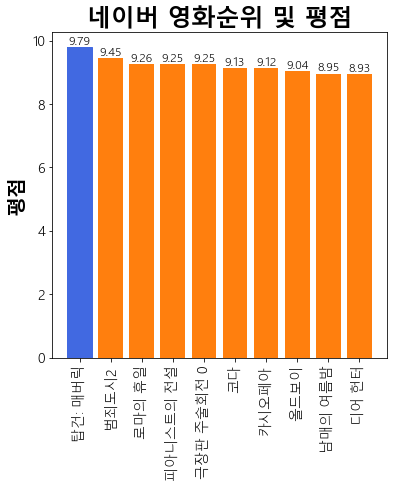

In [26]:
plt.rc("font", family="Malgun Gothic", size=14, weight='light') # 그래프에 한글 폰트 입력
x = movieDf["Title"]
y = movieDf["Point"]
plt.figure(figsize=(6, 6))
plt.bar(x, y)
plt.bar(x, y)[movieDf["Point"].idxmax()].set_color('royalblue')
plt.ylabel('평점', size=20, weight='bold')
plt.title('네이버 영화순위 및 평점', size=24, weight='bold')
plt.xticks(rotation=90)
for i in range(len(x)) :
    plt.text(x[i], y[i], y[i], size=12,
         horizontalalignment='center', verticalalignment='bottom')
plt.show()